In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation
from tensorflow.keras import Model, regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [ ]:
labels = ['images_prepped_train','annotations_prepped_train']
img_size = 256

def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
len(os.listdir(os.path.join(DIR, i)))

In [ ]:
def get_data_reshaped(data_dir):
    data[]
    for i in os.listdir(data_dir):
        subdir = len(os.listdir(os.path.join(data_dir, i))) 
        for jimg in subdir

In [2]:
def get_data_reshaped2(dir, dim =(256,256)):
    
    result = []
    
    for file in sorted(os.listdir(dir)):
        img = cv2.imread(os.path.join(dir, file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
        resize_image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        result.append(resize_image)
        
    return result

In [3]:
xtrain = get_data_reshaped2('Dataset1/images_prepped_train')
yanottrain = get_data_reshaped2('Dataset1/annotations_prepped_train')
xtest = get_data_reshaped2('Dataset1/images_prepped_test')
yanottest = get_data_reshaped2('Dataset1/annotations_prepped_test')

In [ ]:
X_train = reshape('dataset1/images_prepped_train')
y_train = reshape('dataset1/annotations_prepped_train')

X_test = reshape('dataset1/images_prepped_test')
y_test = reshape('dataset1/annotations_prepped_test')

In [ ]:
print(np.array(y_test).shape)
y_testt = keras.utils.to_categorical(y_test, 12)
print(y_testt.shape)

In [ ]:
labels = ['images_prepped_train','annotations_prepped_train']
img_size = 256
def get_data_reshaped(data_dir):
    data = []
    r = []
    for jimg in sorted(os.listdir(data_dir)):
        try:
            print('emmm111',np.array(data).shape)
            #img = cv2.imread(os.path.join(data_dir, jimg))
            img_arr = cv2.imread(os.path.join(data_dir, jimg))[...,::-1] #convert BGR to RGB format
            print('ngihh',img_arr.shape)
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            print('yoaaaa',resized_arr.shape)
            data.append([resized_arr])
            print('emmm',np.array(data).shape)
        except Exception as e:
            print(e)
    return np.array(data)

In [ ]:
xtrain = get_data_reshaped('Dataset1/images_prepped_train')
yanottrain = get_data_reshaped('Dataset1/annotations_prepped_train')
xtest = get_data_reshaped('Dataset1/images_prepped_test')
yanottest = get_data_reshaped('Dataset1/annotations_prepped_test')

In [ ]:
xtrain.shape

In [4]:
xtrain = np.array(xtrain) / 255
yanottrain = np.array(yanottrain)

In [5]:
xtest = np.array(xtest) / 255
yanottest = np.array(yanottest)

In [6]:
yanottrain = keras.utils.to_categorical(yanottrain, 12)
yanottest = keras.utils.to_categorical(yanottest,12)

In [ ]:
yanottrain[150]

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Activation
from tensorflow.keras import Model
from tensorflow.keras.losses import binary_crossentropy
def conv2D_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True ):
    """function to pass Input_tensor through 2- Conv2D layers configured as per the input parameters"""
    # first Conv2D layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
            kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

    # second Conv2D layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
            kernel_initializer = 'he_normal', padding = 'same')(x)
    if batchnorm:
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

    return x


def Unet_Model(input_img, n_filters = 16, dropout = 0.1, batchnorm = True):
    # Encoder (Contraction Path)
    
    input_size = tf.keras.Input(input_img)
                       
    E1 = conv2D_block(input_size, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(E1)
    p1 = Dropout(dropout)(p1)

    E2 = conv2D_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(E2)
    p2 = Dropout(dropout)(p2)

    E3 = conv2D_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(E3)
    p3 = Dropout(dropout)(p3)

    E4 = conv2D_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(E4)
    p4 = Dropout(dropout)(p4)

    E5 = conv2D_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)

    # Decoder (Expansive Path)
    D6 = Conv2DTranspose(n_filters * 8, kernel_size = (3, 3), strides = (2, 2), padding = 'same')(E5)
    D6 = Concatenate()([D6, E4])
    D6 = Dropout(dropout)(D6)
    E6 = conv2D_block(D6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)

    D7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(E6)
    D7 = Concatenate()([D7, E3])
    D7 = Dropout(dropout)(D7)
    E7 = conv2D_block(D7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)

    D8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(E7)
    D8 = Concatenate()([D8, E2])
    D8 = Dropout(dropout)(D8)
    E8 = conv2D_block(D8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)

    D9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(E8)
    D9 = Concatenate()([D9, E1])
    D9 = Dropout(dropout)(D9)
    E9 = conv2D_block(D9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)

    outputs = Conv2D(12, 1, activation='sigmoid')(E9)
    model = Model(inputs=[input_size], outputs=[outputs])
    return model

In [8]:
model = Unet_Model(input_img = (256,256,1))
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 16) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
xtrain.shape

In [10]:
history = model.fit(xtrain, yanottrain, validation_data=(xtest, yanottest), epochs=100, batch_size=16)

Epoch 1/100
23/23 [==============================] - 233s 10s/step - loss: 2.1628 - accuracy: 0.3588 - val_loss: 101.0730 - val_accuracy: 0.0888
Epoch 2/100
23/23 [==============================] - 229s 10s/step - loss: 1.6816 - accuracy: 0.5864 - val_loss: 199.8505 - val_accuracy: 0.0888
Epoch 3/100
23/23 [==============================] - 222s 10s/step - loss: 1.3746 - accuracy: 0.6857 - val_loss: 56.5300 - val_accuracy: 0.0965
Epoch 4/100
23/23 [==============================] - 221s 10s/step - loss: 1.1867 - accuracy: 0.7199 - val_loss: 2.8408 - val_accuracy: 0.3732
Epoch 5/100
23/23 [==============================] - 221s 10s/step - loss: 1.0292 - accuracy: 0.7568 - val_loss: 2.8485 - val_accuracy: 0.3408
Epoch 6/100
23/23 [==============================] - 221s 10s/step - loss: 0.9335 - accuracy: 0.7713 - val_loss: 2.9085 - val_accuracy: 0.2921
Epoch 7/100
23/23 [==============================] - 228s 10s/step - loss: 0.8665 - accuracy: 0.7808 - val_loss: 2.4639 - val_accuracy: 0

Epoch 58/100
23/23 [==============================] - 233s 10s/step - loss: 0.3344 - accuracy: 0.9047 - val_loss: 0.4641 - val_accuracy: 0.8755
Epoch 59/100
23/23 [==============================] - 272s 12s/step - loss: 0.3320 - accuracy: 0.9049 - val_loss: 0.4827 - val_accuracy: 0.8684
Epoch 60/100
23/23 [==============================] - 246s 11s/step - loss: 0.3247 - accuracy: 0.9071 - val_loss: 0.4561 - val_accuracy: 0.8777
Epoch 61/100
23/23 [==============================] - 227s 10s/step - loss: 0.3201 - accuracy: 0.9084 - val_loss: 0.5119 - val_accuracy: 0.8676
Epoch 62/100
23/23 [==============================] - 228s 10s/step - loss: 0.3227 - accuracy: 0.9077 - val_loss: 0.5214 - val_accuracy: 0.8684
Epoch 63/100
23/23 [==============================] - 287s 13s/step - loss: 0.3150 - accuracy: 0.9098 - val_loss: 0.4942 - val_accuracy: 0.8707
Epoch 64/100
23/23 [==============================] - 267s 12s/step - loss: 0.3185 - accuracy: 0.9088 - val_loss: 0.4722 - val_accuracy:

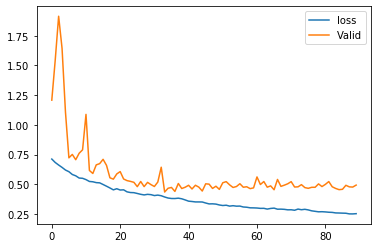

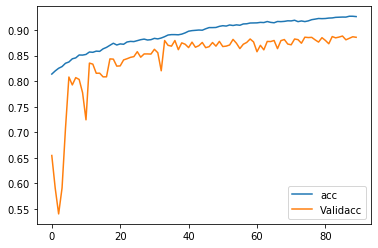

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss[10:], label='loss')
plt.plot(val_loss[10:], label='Valid')
plt.legend()
plt.show()

plt.plot(acc[10:], label='acc')
plt.plot(val_acc[10:], label='Validacc')
plt.legend()
plt.show()

plt.plot

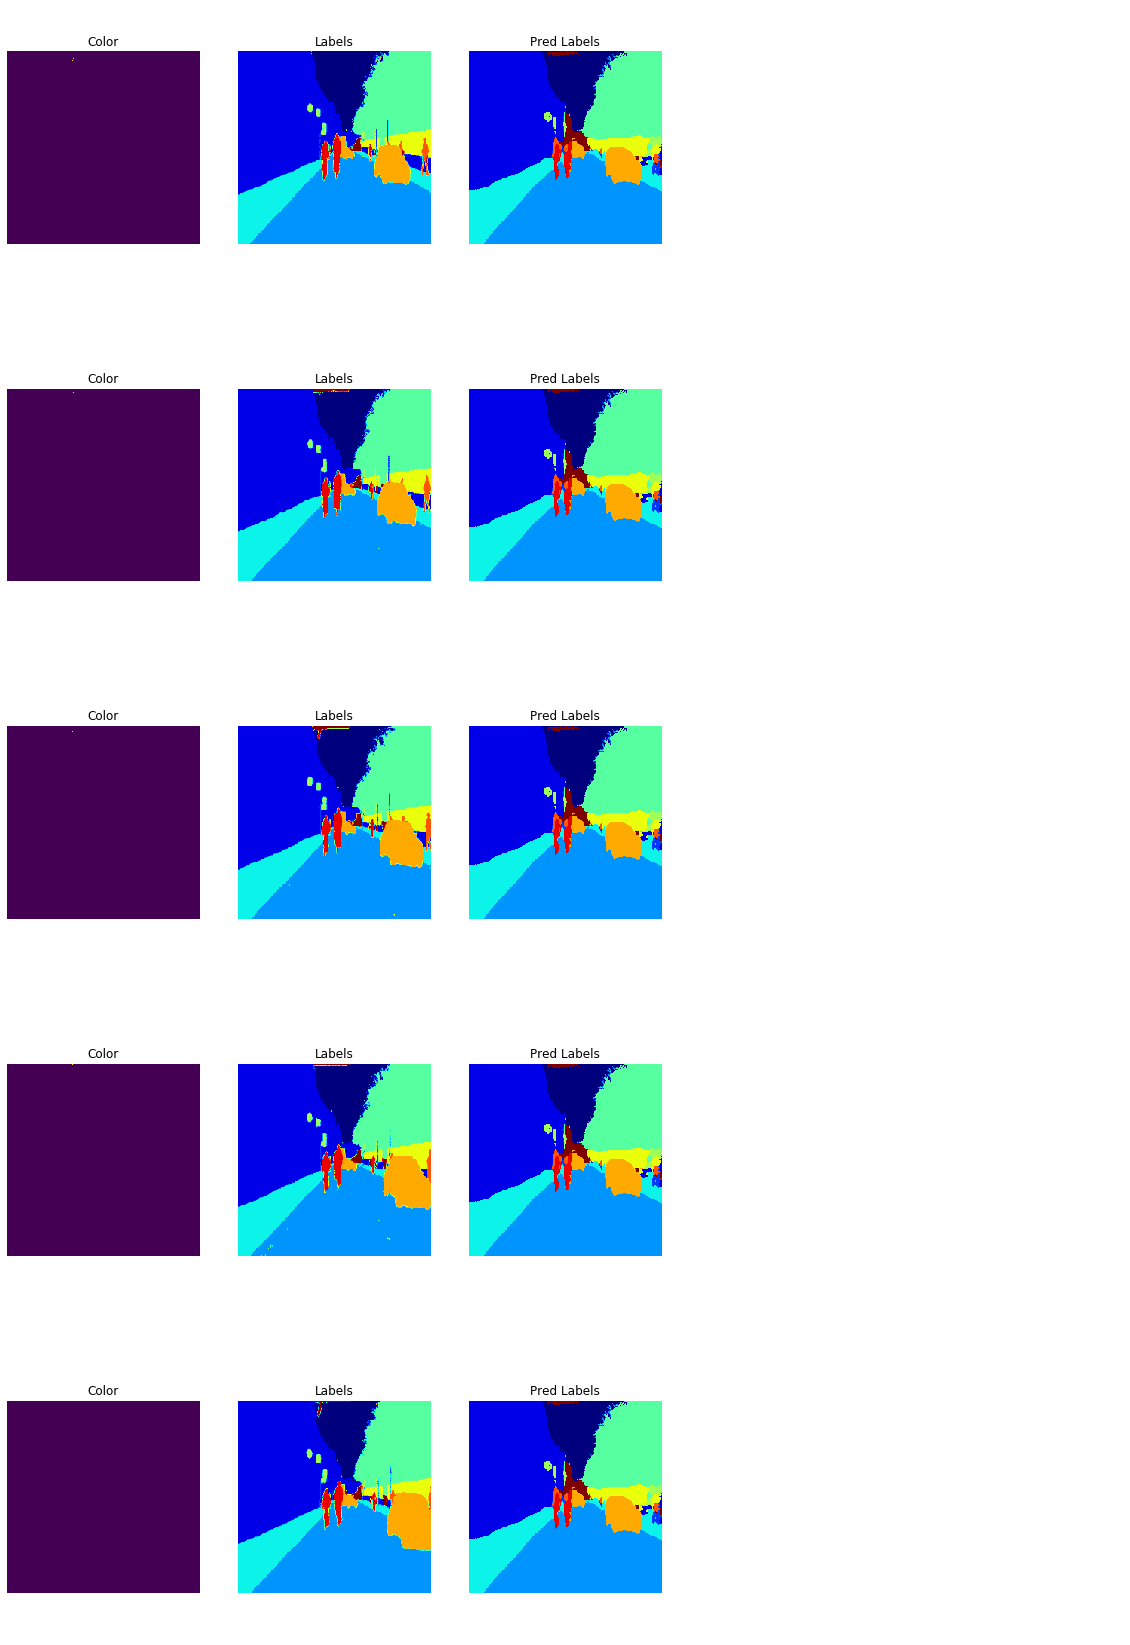

In [15]:
rgb_batch = xtest
lab_batch = yanottest
sample_rows = 5
fig, m_axs = plt.subplots(sample_rows, 5, figsize = (20, 6*sample_rows))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2, ax2_pred, ax3, ax3_pred), rgb_img, lab_img in zip(m_axs, rgb_batch, lab_batch):
    
    r_rgb_img = np.clip(rgb_img+110, 0, 255).astype(np.uint8)
    lab_pred = model.predict(rgb_batch)[0]
    
    ax1.imshow(r_rgb_img)
    ax1.set_title('Color')
    ax2.imshow(np.argmax(lab_img, axis=-1), cmap = 'jet')
    ax2.set_title('Labels')
    ax2_pred.imshow(np.argmax(lab_pred, axis=-1), cmap='jet')
    #ax2_pred.imshow(lab_pred[:,:,0], cmap = 'jet')
    ax2_pred.set_title('Pred Labels')
#fig.savefig('Model Evaluation.png')
plt.show()

In [23]:
model.save("modelfinalproject.h5")

In [17]:
def IoU_coeff(y_true, y_pred):
    axes = (1,2) 
    intersection = np.sum(np.abs(y_pred * y_true), axis=axes) 
    mask = np.sum(np.abs(y_true), axis=axes) + np.sum(np.abs(y_pred), axis=axes)
    union = mask - intersection
    smooth = .001
    iou = (intersection + smooth) / (union + smooth)

    return iou

In [28]:
oy= (yanottest, model.predict(rgb_batch))

iou = IoU_coeff(yanottest, model.predict(rgb_batch))
intersection = np.sum(np.logical_and(yanottest, model.predict(rgb_batch)))
union = np.sum(np.logical_or(yanottest, model.predict(rgb_batch)))
iou = np.mean((intersection)/union)
print('kok jelek ini??',iou)

kok jelek ini?? 0.08333333333333333


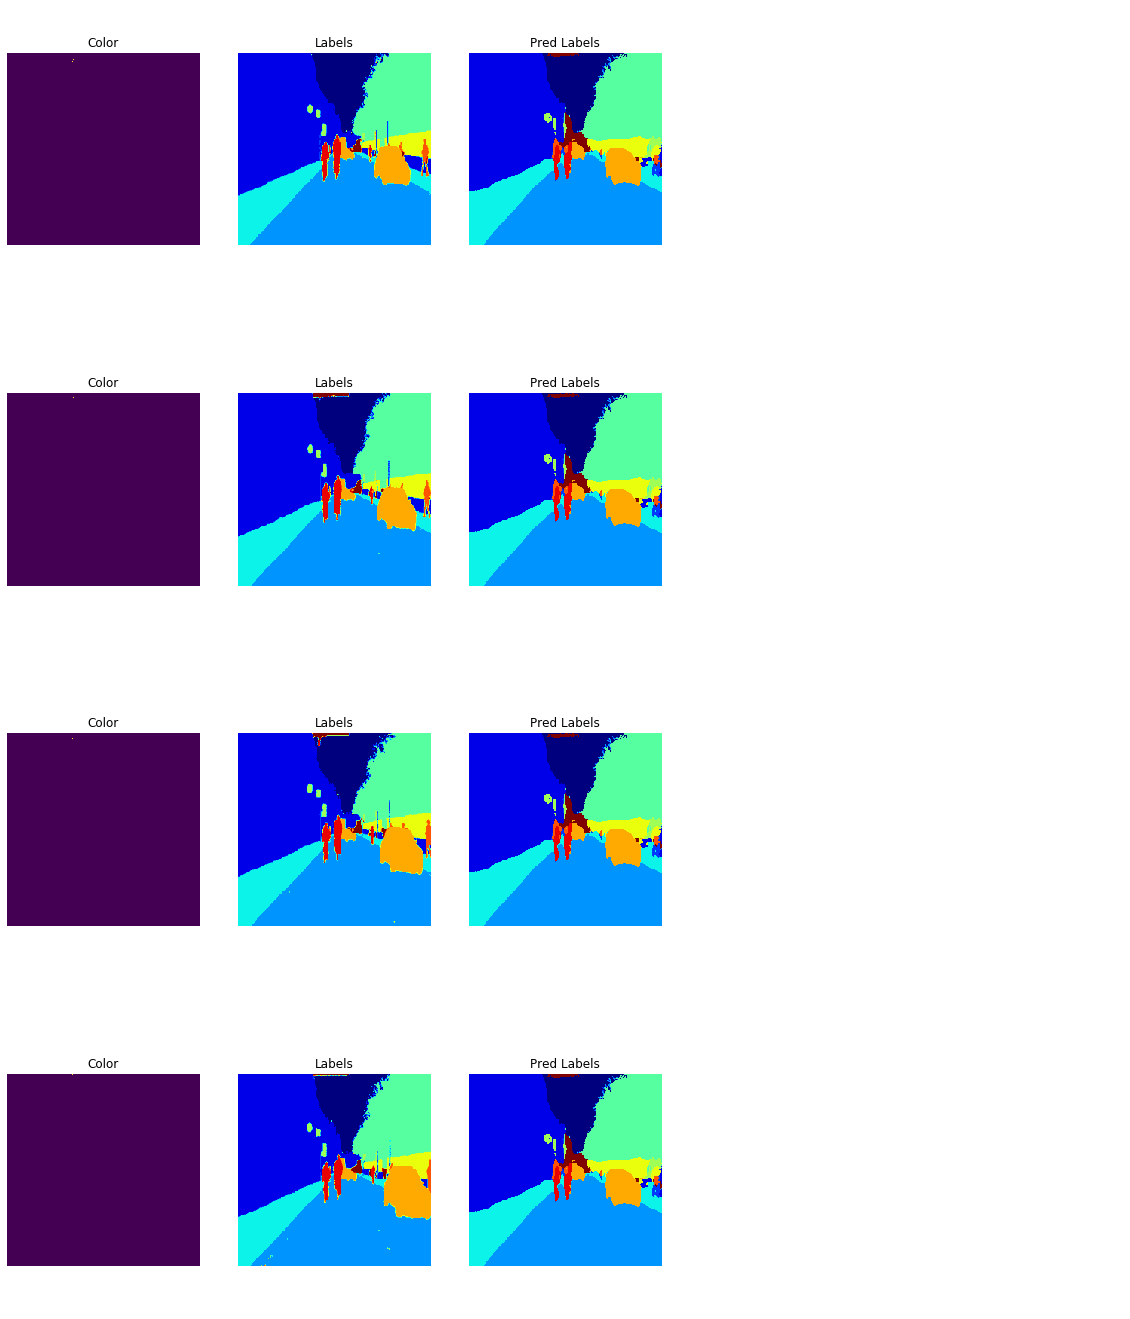

In [27]:
rgb_batch = xtest
lab_batch = yanottest
sample_rows = 4
fig, m_axs = plt.subplots(sample_rows, 5, figsize = (20, 6*sample_rows))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2, ax2_pred, ax3, ax3_pred), rgb_img, lab_img in zip(m_axs, rgb_batch, lab_batch):
    
    r_rgb_img = np.clip(rgb_img+110, 0, 255).astype(np.uint8)
    lab_pred = model.predict(rgb_batch)[0]
    
    ax1.imshow(r_rgb_img)
    ax1.set_title('Color')
    ax2.imshow(np.argmax(lab_img, axis=-1), cmap = 'jet')
    ax2.set_title('Labels')
    ax2_pred.imshow(np.argmax(lab_pred, axis=-1), cmap='jet')
    #ax2_pred.imshow(lab_pred[:,:,0], cmap = 'jet')
    ax2_pred.set_title('Pred Labels')
#fig.savefig('Model Evaluation.png')
plt.show()

## Train VGG